In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA

In [2]:
# load the data
data = sio.loadmat('Data/data.mat')

In [3]:
# get all the faces - 24*21*600
faces = data.get('face')

In [4]:
faces

array([[[-1.66302198, -1.65747701, -1.44019944, ..., -1.48137039,
         -1.48016364, -1.2304861 ],
        [-1.8737163 , -1.87838629, -1.75452002, ..., -1.68532338,
         -1.70026232, -1.55540097],
        [-1.8737163 , -1.87838629, -1.75452002, ..., -1.68532338,
         -1.70026232, -1.55540097],
        ...,
        [-1.8737163 , -1.87838629, -1.75452002, ..., -1.68532338,
         -1.70026232, -1.55540097],
        [-1.8737163 , -1.87838629, -1.75452002, ..., -1.68532338,
         -1.70026232, -1.55540097],
        [-1.8737163 , -1.87838629, -1.75452002, ..., -1.68532338,
         -1.70026232, -1.55540097]],

       [[-1.8737163 , -1.87838629, -1.75452002, ..., -1.68532338,
         -1.70026232, -1.55540097],
        [-1.8737163 , -1.87838629, -1.75452002, ..., -1.68532338,
         -1.70026232, -1.55540097],
        [-1.8737163 , -1.87838629, -1.75452002, ..., -1.68532338,
         -1.70026232, -1.55540097],
        ...,
        [-1.8737163 , -1.87838629, -1.75452002, ..., -

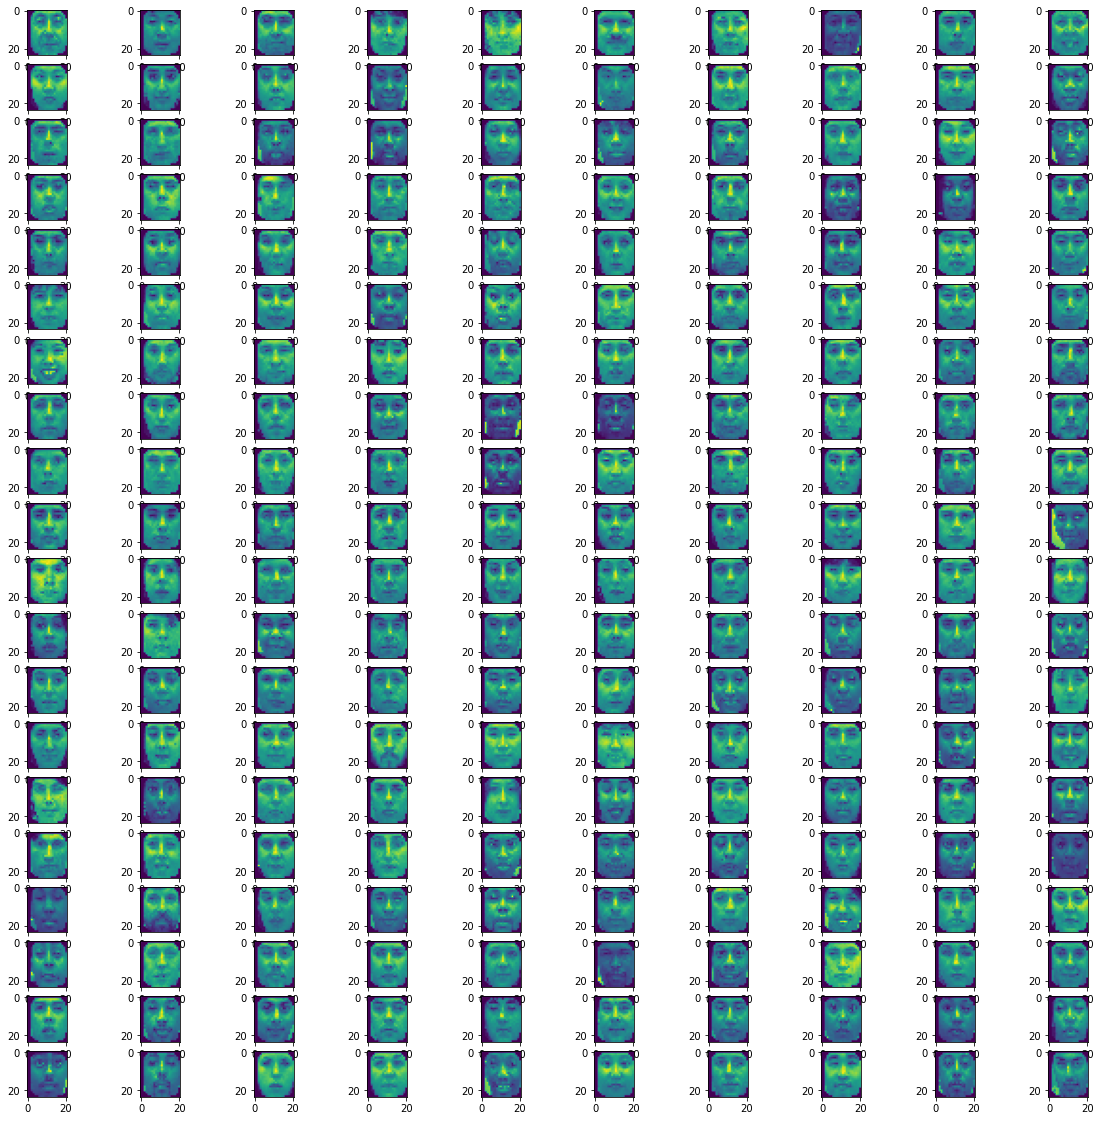

In [ ]:
fig, ax_array = plt.subplots(nrows=20, ncols=10, figsize=(20,20))

# flatten the array of axes, which makes them easier to iterate through and assign
ax_array = ax_array.flatten()

c = 2
# plot the faces
for i, ax in enumerate(ax_array):
    ax.imshow(faces[:,:,c])
    c+=3


# Build up the training and testing data

In [6]:
# init the training and testing datad
total_subjects = 200
training_size = int((2/3)*faces.shape[2])
testing_size = int((1/3)*faces.shape[2])
# training_data = np.zeros(shape=(training_size, faces.shape[0]*faces.shape[1]))
# testing_data = np.zeros(shape=(testing_size, faces.shape[0]*faces.shape[1]))
training_data= []
testing_data = []

In [7]:
c = 1 # counter to pick random sample from either illumination or 
train_index = 0
test_index = 0
for i in range(0, faces.shape[2], 3):
    # training_data[train_index] = faces[:,:,i].flatten()
    training_data.append(faces[:,:,i+2].flatten())
    if c % 2 == 0:
        # training_data[train_index+1] = faces[:,:,i+1].flatten()
        # testing_data[test_index] = faces[:,:,i+2].flatten()
        training_data.append(faces[:,:,i+1].flatten())
        testing_data.append(faces[:,:,i].flatten())
    else:
        # training_data[train_index+1] = faces[:,:,i+2].flatten()
        # testing_data[test_index] = faces[:,:,i+1].flatten()
        training_data.append(faces[:,:,i].flatten())
        testing_data.append(faces[:,:,i+1].flatten())

    train_index += 2
    test_index += 1
    c += 1

In [8]:
training_data[0].shape

(504,)

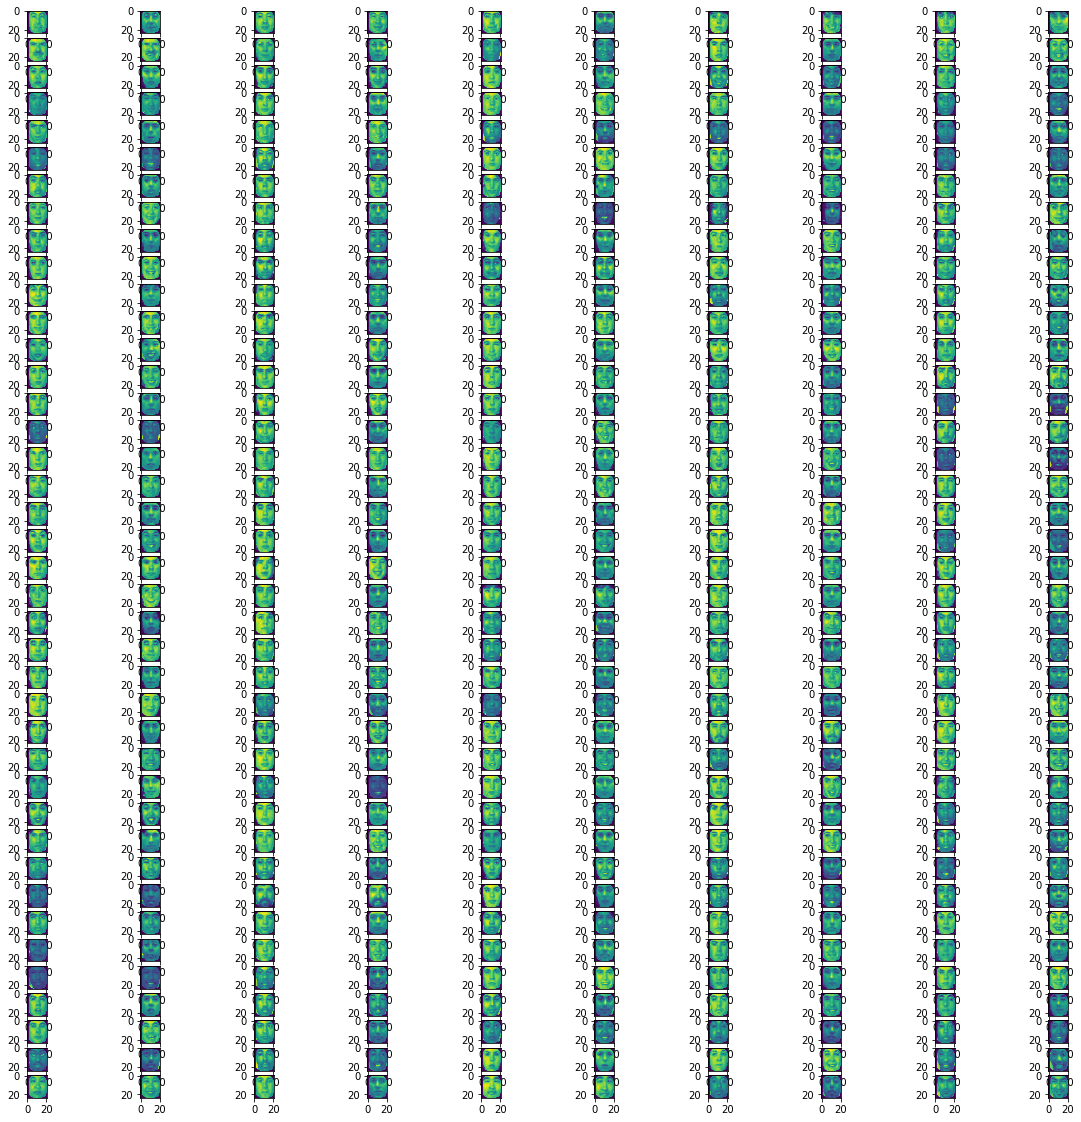

In [299]:
fig, ax_array = plt.subplots(nrows=40, ncols=10, figsize=(20,20))

# flatten the array of axes, which makes them easier to iterate through and assign
ax_array = ax_array.flatten()

# plot the faces
for i, ax in enumerate(ax_array):
    ax.imshow(training_data[i].reshape(24,21))

# Compute the Covariance and Mean of each class

In [10]:
mu = []
cov = []
for i in range(0, len(training_data), 2):
    mean = ((training_data[i] + training_data[i+1]) / 2).reshape(1, 504)
    cov1 = np.matmul((training_data[i]-mean).T, training_data[i]-mean)
    cov2 = np.matmul((training_data[i+1]-mean).T, training_data[i+1]-mean)
    noise = 0.24*np.identity(cov1.shape[0])
    cov_ = (cov1 + cov2)/2 + noise
    cov.append(cov_)
    mu.append(mean)
    if np.linalg.det(cov_) == 0 or np.linalg.det(cov_) == 0.0:
        print('alert - zero determinant')

## PCA

In [9]:
check = np.zeros(shape=(600, faces.shape[0]*faces.shape[1]))
print(check.shape)

for i in range(600):
    temp = faces[:,:,i]
    check[i] = temp.flatten()

pca = PCA(150)
projected = pca.fit_transform(check)
print(projected.shape)

(600, 504)
(600, 150)


In [10]:
usePCA = True
if (usePCA):
    training_data = []
    testing_data = []
    c = 1 # counter to pick random sample from either illumination or 
    for i in range(0, faces.shape[2], 3):
        training_data.append(projected[i+2])
        # if c % 2 == 0:
        training_data.append(projected[i+1])
        testing_data.append(projected[i])
        # else:
        #     training_data.append(projected[i])
        #     testing_data.append(projected[i+2])
        # c += 1

In [17]:
if(usePCA):
    mu = []
    cov = []
    for i in range(0, len(training_data), 2):
        mean = ((training_data[i] + training_data[i+1]) / 2).reshape(1, projected.shape[1])
        cov1 = np.matmul((training_data[i]-mean).T, training_data[i]-mean)
        cov2 = np.matmul((training_data[i+1]-mean).T, training_data[i+1]-mean)
        noise = 0.99*np.identity(cov1.shape[0])
        cov_ = (cov1 + cov2)/2 + noise
        # print(np.linalg.det(cov_))
        # break
        cov.append(cov_)
        mu.append(mean)
        if np.linalg.det(cov_) == 0 or np.linalg.det(cov_) == 0.0:
            print('alert - zero determinant')
    

# Find the maximum likelihood for each subject

In [18]:
score = 0
for i in range(testing_size):
    likelihood_list = []
    for j in range(testing_size):
        likelihood = (-0.5)*math.log(np.linalg.det(cov[j])) - (0.5)*np.dot( testing_data[i]-mu[j], np.dot( np.linalg.inv(cov[j]), (testing_data[i]-mu[j]).T ) )
        likelihood_list.append(likelihood)
    temp = np.array(likelihood_list)
    if np.argmax(temp) == i:
        score += 1
        print('Correct, score is now ', score)
    else:
        print('Incorrect Score for subject ', i)
print('Accuracy = ', (score*100/total_subjects))

Correct, score is now  1
Correct, score is now  2
Correct, score is now  3
Correct, score is now  4
Correct, score is now  5
Correct, score is now  6
Correct, score is now  7
Incorrect Score for subject  7
Correct, score is now  8
Correct, score is now  9
Correct, score is now  10
Correct, score is now  11
Incorrect Score for subject  12
Incorrect Score for subject  13
Incorrect Score for subject  14
Correct, score is now  12
Correct, score is now  13
Correct, score is now  14
Correct, score is now  15
Correct, score is now  16
Incorrect Score for subject  20
Correct, score is now  17
Correct, score is now  18
Correct, score is now  19
Correct, score is now  20
Correct, score is now  21
Correct, score is now  22
Correct, score is now  23
Incorrect Score for subject  28
Correct, score is now  24
Correct, score is now  25
Correct, score is now  26
Correct, score is now  27
Incorrect Score for subject  33
Correct, score is now  28
Correct, score is now  29
Incorrect Score for subject  36


In [19]:
# score = 0
# for i in range (testing_size):
#     dist = np.zeros(shape=(testing_size))
#     for j in range (testing_size):
#         d = np.dot(testing_data[i] - mu[j], np.dot(np.linalg.inv(cov[j]), (testing_data[i] - mu[j]).T))
#         dist[j] = d.flatten()[0]
#     print(np.argsort(dist)[0])
#     print(i)
#     print('-----------------')
#     # break
#     if np.argsort(dist)[0] == i:
#         score +=1
# print('Accuracy of 1-NN = ', (score*100/total_subjects))

In [20]:
# print('Accuracy of 1-NN = ', (score*100/total_subjects))

In [21]:
# score = 0
# for i in range (testing_size):
#     dist = np.zeros(shape=(training_size))
#     for j in range (training_size):
#         d = np.linalg.norm(testing_data[i] - training_data[j])
#         # print(d)
#         dist[j] = d
#     print(np.argsort(dist)[0])
#     print(i)
    
#     # break
#     if int(np.argsort(dist)[0]/2) == i:
#         print('Correct')
#         score +=1
#     else:
#         print('Incorrect')
#     print('-----------------')
# print('Accuracy of 1-NN = ', (score*100/total_subjects))